<a href="https://colab.research.google.com/github/bethuunltd/PytorchCodemy/blob/main/CNNMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
from torchvision import transforms,datasets
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import pandas as pd

In [2]:
transform = transforms.ToTensor()
train_data  = datasets.MNIST(root='./data',train=True,download=True,transform=transform)

test_data = datasets.MNIST(root='.data',train=False,download=True,transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 11.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 343kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.76MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.03MB/s]
100%|██████████| 9.91M/9.91M [00:00<00:00, 11.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 341kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.1MB/s]


In [3]:
train_data,test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [5]:
for i,(X_train,y_train) in enumerate(train_data):
    break

In [6]:
X_train.shape

torch.Size([1, 28, 28])

In [8]:
conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride = 1)
conv2 = nn.Conv2d(in_channels =6,out_channels=16,kernel_size=3,stride=1)

In [38]:
x= X_train.view(1,1,28,28)
y = conv1(x)
x = F.relu(y)
x.shape
#Single image, 6 is the number of filters/output channels/feature maps, the last two are the dimensions now, depending on the kernel size. We might lose data by convolution. Vary the kernel size and watch how the dimensions change.

torch.Size([1, 6, 26, 26])

In [39]:
x = F.max_pool2d(x,kernel_size=2,stride=2)
x.shape

torch.Size([1, 6, 13, 13])

In [40]:
x = F.relu(conv2(x))

In [41]:
x.shape

torch.Size([1, 16, 11, 11])

In [42]:
x = F.max_pool2d(x,2,2)

In [43]:
x.shape

torch.Size([1, 16, 5, 5])

In [6]:
class ConvNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride = 1)
    self.conv2 = conv2 = nn.Conv2d(in_channels =6,out_channels=16,kernel_size=3,stride=1)
    self.fc1 = nn.Linear(in_features=16*5*5,out_features=120)#in is for the above x, out is just arbitrary
    self.fc2 = nn.Linear(in_features=120,out_features=84)
    self.fc3 = nn.Linear(in_features=84,out_features=10)#Just has to end with 10, as that is the number of classes we have here

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x,dim=1)





In [7]:

torch.manual_seed(41)
model = ConvNN()
model


ConvNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)


In [10]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    predicted = torch.max(y_pred.data,1)[1]#Add the number of correct prediction
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 ==0:
      print(f"Epoch {i}, batch {b}, loss {loss.item()}")
    train_losses.append(loss)
  train_correct.append(trn_corr)


  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted == y_test).sum()
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()

total=  current_time- start_time

print(f"Time taken: {total/60} minutes")

Epoch 0, batch 600, loss 0.021179210394620895
Epoch 0, batch 1200, loss 0.0010501493234187365
Epoch 0, batch 1800, loss 0.22124436497688293
Epoch 0, batch 2400, loss 0.09684761613607407
Epoch 0, batch 3000, loss 0.1201619952917099
Epoch 0, batch 3600, loss 6.462667079176754e-05
Epoch 0, batch 4200, loss 5.3532909078057855e-05
Epoch 0, batch 4800, loss 0.0003234446339774877
Epoch 0, batch 5400, loss 0.005558627191931009
Epoch 0, batch 6000, loss 0.0016213164199143648
Epoch 1, batch 600, loss 0.09637419134378433
Epoch 1, batch 1200, loss 0.015066063031554222
Epoch 1, batch 1800, loss 0.0004120176599826664
Epoch 1, batch 2400, loss 0.0003234826144762337
Epoch 1, batch 3000, loss 0.3126724362373352
Epoch 1, batch 3600, loss 0.00016358238644897938
Epoch 1, batch 4200, loss 0.022469433024525642
Epoch 1, batch 4800, loss 0.00553911691531539
Epoch 1, batch 5400, loss 0.00862799771130085
Epoch 1, batch 6000, loss 0.008206365630030632
Epoch 2, batch 600, loss 0.00023855813196860254
Epoch 2, batc

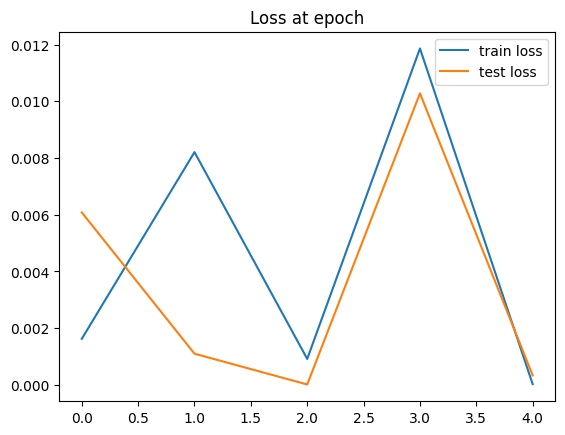

In [17]:
train_losses = [tl for tl in train_losses]

plt.plot(train_losses,label="train loss")
plt.plot(test_losses,label="test loss")

plt.title("Loss at epoch")
plt.legend()


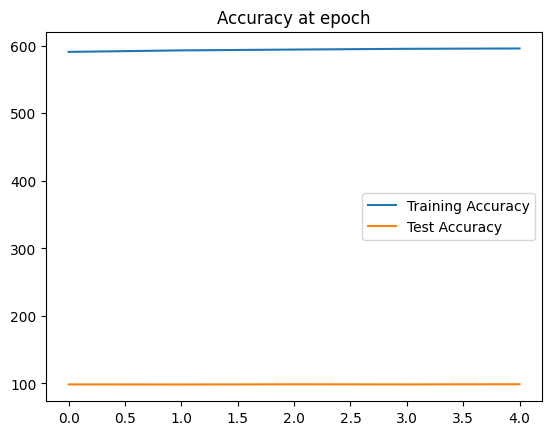

In [14]:
plt.plot([t/100 for t in train_correct],label = "Training Accuracy" )
plt.plot([t/100 for t in test_correct],label = "Test Accuracy")
plt.title("Accuracy at epoch")
plt.legend()

In [18]:
with torch.no_grad():
  correct = 0
  for X_test,y_test in test_loader:
    y_val = model(X_test)
    predicted = torch.max(y_val.data,1)[1]
    correct += (predicted == y_test).sum()

In [20]:
correct.item()/len(test_data)*100

98.9

In [21]:
test_data[4141]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [22]:
#Get just the features
X_test = test_data[4141][0].reshape(28,28)


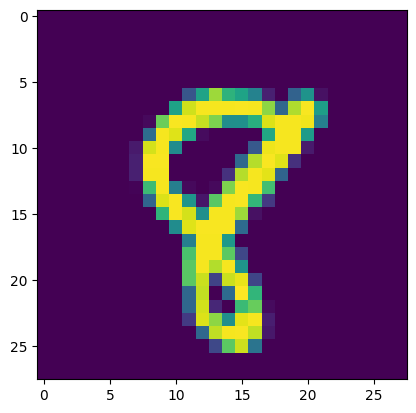

In [23]:
plt.imshow(X_test)

In [25]:
model.eval()
with torch.no_grad():
  new_pred = model(X_test.view(1,1,28,28))



new_pred

tensor([[-2.5399e+01, -2.5025e+01, -2.6521e+01, -1.5313e+01, -2.9052e+01,
         -1.9269e+01, -2.3063e+01, -2.6239e+01, -2.3842e-07, -1.7919e+01]])

In [27]:
new_pred.argmax()

tensor(8)

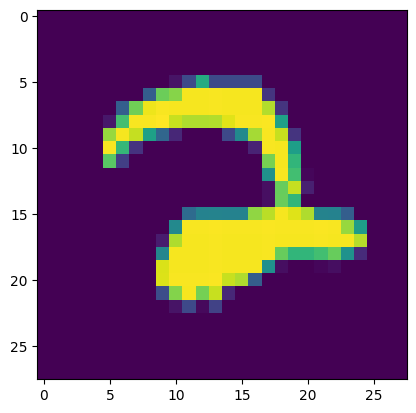

In [28]:
X_test = test_data[1947][0].reshape(28,28)
plt.imshow(X_test)

In [30]:
model.eval()
with torch.no_grad():
  pred = model(X_test.view(1,1,28,28))


pred.argmax()

tensor(2)